Why Unsupervised Learning?

Unsupervised learning was applied to explore inherent patterns
in food nutrition data without relying on predefined labels.

Process:
- Features were standardized and reduced using PCA
- KMeans clustering was applied for structured grouping
- DBSCAN was used to identify density-based clusters and noise
- Elbow Method and Silhouette Score validated cluster quality

This exploratory phase helps understand data structure
and supports informed decisions before supervised modeling.


In [2]:
#Load Inference-Ready Features

import pandas as pd
import numpy as np

X = pd.read_csv("../data/processed/X_features_inference_ready.csv")
X = X.drop(columns=['Food_Name'], errors='ignore')

X.shape



(31387, 19)

In [3]:
# Dimensionality Reduction with PCA

# Using PCA  to reduce the feature space to 10 components

from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)

X_pca.shape


(31387, 10)

  #### Elbow Method + Silhouette Score
  
- Unsupervised models do not have ground truth labels.
- Therefore, internal evaluation metrics such as
- Elbow Method and Silhouette Score are used.


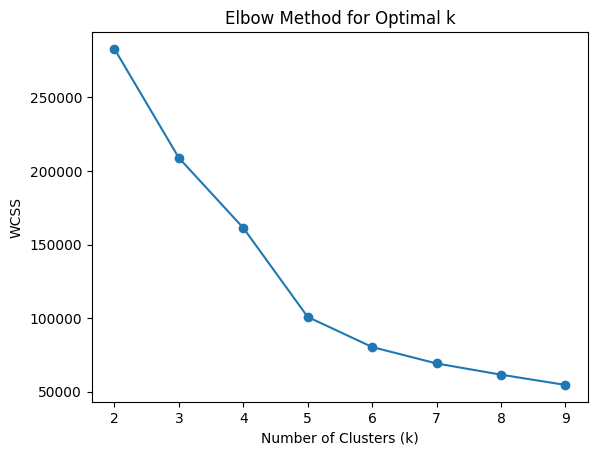

In [11]:
# Elbow Method to Determine Optimal Clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


 **After Graph :** Look for the elbow point where WCSS reduction slows.

In [5]:
# sillouette Analysis or Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.420
k=3, Silhouette Score=0.478
k=4, Silhouette Score=0.332
k=5, Silhouette Score=0.378


**After Silhouette Score :** Higher silhouette score = better cluster separation

# Visualize Clusters Properly [ PCA 2D]

- Clusters are visualized using PCA-reduced 2D space to interpret separation and overlap between groups.


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

#### PCA 2D Visualization

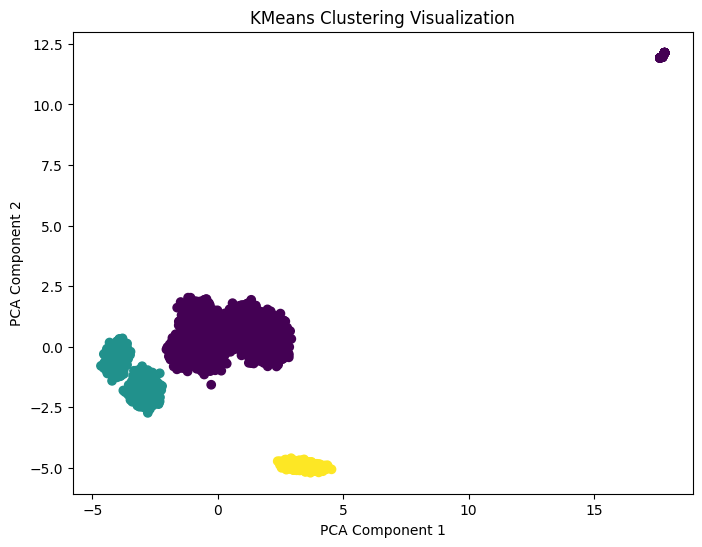

In [8]:
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering Visualization")
plt.show()


## Compare KMeans vs DBSCAN

Different clustering algorithms capture different data structures.
KMeans assumes spherical clusters, while DBSCAN identifies density-based clusters.


In [9]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_pca)

pd.Series(db_clusters).value_counts()


-1      2519
 21      669
 2       645
 0       644
 10      643
        ... 
 152       5
 150       5
 146       5
 148       5
 151       4
Name: count, Length: 154, dtype: int64

**Result Represent :** -1 represents noise points.

In [10]:
#Silhouette Comparison

mask = db_clusters != -1

if len(set(db_clusters[mask])) > 1:
    db_score = silhouette_score(X_pca[mask], db_clusters[mask])
    print("DBSCAN Silhouette Score:", round(db_score, 3))
else:
    print("DBSCAN did not form valid clusters")


DBSCAN Silhouette Score: 0.21


KMeans:
- Faster
- Requires predefined k
- Suitable for compact clusters

DBSCAN:
- Detects noise
- No need to specify k
- Sensitive to parameter selection


Outcome:
- Optimal cluster count identified using Elbow & Silhouette methods
- Clear visual separation observed in PCA space
- KMeans selected for structured clustering
- DBSCAN provided complementary density-based insight
